# Violin Plot

In [3]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.0)

fig_dir = "../experiments/ne_mnist/figures/prior/"

NORMALIZE = True  # whether to normalize the offset of the prior

MODEL_DIR = "../experiments/ne_mnist"
INVERT_MODE = "cvx_cg"
perturb_mode = "gaussian"
PRIOR_DIR = os.path.join(MODEL_DIR, "prior")
result_dir = os.path.join(PRIOR_DIR, INVERT_MODE, perturb_mode, "all")

# load data
df = pd.read_csv(os.path.join(result_dir, "prior.csv"))

# reshape for seaborn
df = pd.melt(df)

if NORMALIZE:
    # normalize the offset of the prior to 0
    df["value"] = df["value"] - df["value"].min()

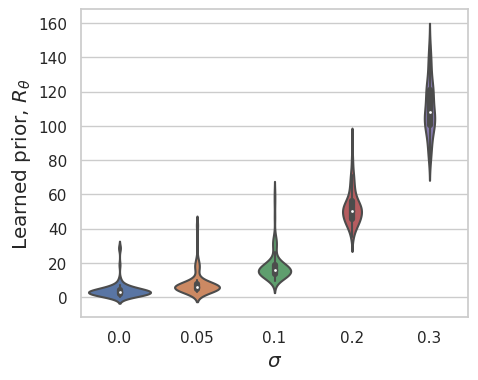

In [4]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.violinplot(data=df, x="variable", y="value")
if perturb_mode == "convex":
    ax.set_xlabel(r"$\lambda$", fontsize="large")
else:
    ax.set_xlabel(r"$\sigma$", fontsize="large")
ax.set_ylabel("Learned prior, " + r"$R_\theta$", fontsize="large")
os.makedirs(fig_dir, exist_ok=True)
plt.savefig(
    os.path.join(fig_dir, f"ne_mnist_{perturb_mode}_violin.pdf"),
    bbox_inches="tight",
)